<a href="https://colab.research.google.com/github/damerei/DS-Unit-2-Sprint-4-Practicing-Understanding/blob/master/DS_Unit_2_Sprint_Challenge_4_Practicing_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science Unit 2_
 
 # Sprint Challenge: Practicing & Understanding Predictive Modeling

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

In [5]:
!pip install category_encoders

In [0]:
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error


### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) **Use cross-validation** to **do hyperparameter optimization**, and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:

- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

_To earn a score of 3 for this part, make at least two of these visualization types._

### Part 4: Gradient Descent

Answer both of these two questions:

- What does Gradient Descent seek to minimize?
- What is the "Learning Rate" and what is its function?

One sentence is sufficient for each.

_To earn a score of 3 for this part, go above and beyond. Show depth of understanding and mastery of intuition in your answers._

## **Part 1 + Part 2**

Inspection Type is the variable most likely to be leaky, since it sometimes refers to "re-inspections", therefore implying some failure in a previous inspection. 

In [2]:
train.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [0]:

train = train.dropna()

test = test.dropna()

In [0]:
X_train = train.drop(columns='Fail')

X_test = test.drop(columns='Fail')

y_train = train['Fail']

y_test = test['Fail']

In [44]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RobustScaler(), 
    RandomForestClassifier(n_estimators=100, max_depth=10)
)

scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=10, n_jobs=-1, verbose=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.4s
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


In [45]:
scores

array([0.67959944, 0.68327224, 0.67354561, 0.69531671, 0.69455653,
       0.70279065, 0.70553671, 0.69913357, 0.70911188, 0.6984033 ])

In [0]:
encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)

In [64]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor





param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1,5),
}

search = RandomizedSearchCV(
    XGBRegressor(n_jobs=-1, random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=10, # Gives a progress report
    return_train_score=True,
    random_state=42
)

search.fit(X_train, y_train)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 13

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe4bd53d748>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe4bd5656a0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=10)

In [66]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
9,8.177639,0.029370,0.135968,0.006302,3,199,"{'max_depth': 3, 'n_estimators': 199}",0.671075,0.715209,0.707471,0.697918,0.019242,1,0.752310,0.750614,0.747560,0.750161,0.001966
4,7.021146,0.041621,0.121344,0.004077,3,171,"{'max_depth': 3, 'n_estimators': 171}",0.673923,0.713248,0.705461,0.697543,0.017003,2,0.746852,0.744015,0.741161,0.744009,0.002324
2,5.007192,0.028965,0.090950,0.002812,3,121,"{'max_depth': 3, 'n_estimators': 121}",0.673852,0.709730,0.706027,0.696536,0.016112,3,0.734851,0.731951,0.729125,0.731975,0.002338
6,5.662608,0.019196,0.099754,0.004067,3,137,"{'max_depth': 3, 'n_estimators': 137}",0.671609,0.710336,0.707512,0.696485,0.017628,4,0.737927,0.735839,0.732794,0.735520,0.002108
5,10.780708,0.070524,0.179584,0.006127,3,264,"{'max_depth': 3, 'n_estimators': 264}",0.674269,0.716768,0.698251,0.696429,0.017398,5,0.765940,0.761146,0.759414,0.762167,0.002760


In [67]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
29,3.920305,0.036665,0.060727,0.000594,1,216,"{'max_depth': 1, 'n_estimators': 216}",0.660873,0.673060,0.672957,0.668963,0.005721,46,0.678195,0.673142,0.673823,0.675053,0.002239
14,3.995701,0.017754,0.062849,0.001213,1,210,"{'max_depth': 1, 'n_estimators': 210}",0.660454,0.672145,0.672788,0.668462,0.005669,47,0.677418,0.672357,0.673413,0.674396,0.002180
7,2.898893,0.010165,0.049577,0.000474,1,149,"{'max_depth': 1, 'n_estimators': 149}",0.657287,0.668225,0.669022,0.664844,0.005354,48,0.671769,0.667617,0.669640,0.669675,0.001695
18,2.043101,0.004938,0.038857,0.000687,1,108,"{'max_depth': 1, 'n_estimators': 108}",0.655584,0.662415,0.665925,0.661308,0.004294,49,0.668083,0.662747,0.665327,0.665386,0.002179
3,1.413729,0.001558,0.031499,0.000688,1,70,"{'max_depth': 1, 'n_estimators': 70}",0.651589,0.660007,0.661881,0.657826,0.004476,50,0.661895,0.660871,0.658668,0.660478,0.001346


In [0]:
#Trying to see what happens if I drop the leaky variable



In [0]:
X_train2 = train.drop(columns=['Fail', 'Inspection Type'])

X_test2 = test.drop(columns=['Fail', 'Inspection Type'])

y_train2 = train['Fail']

y_test2 = test['Fail']

In [0]:
encoder2 = ce.OrdinalEncoder()
X_train2 = encoder2.fit_transform(X_train2)

In [63]:

param_distributions = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1,5),
}

search2 = RandomizedSearchCV(
    XGBRegressor(n_jobs=-1, random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=10, # Gives a progress report
    return_train_score=True,
    random_state=42
)

search2.fit(X_train2, y_train2)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe4bd53d4a8>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe4bd55a2e8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=10)

In [0]:
rank_scores = pd.DataFrame(search2.cv_results_).sort_values(by='rank_test_score').head()

In [70]:
print(pd.DataFrame(search2.cv_results_).sort_values(by='rank_test_score')[:1])

   mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
5      10.512681      0.020664  ...          0.726234          0.00162

[1 rows x 18 columns]


In [72]:
print(rank_scores['mean_test_score'])

5    0.630254
0    0.629971
4    0.628514
9    0.628329
6    0.626667
Name: mean_test_score, dtype: float64


# **Part 3**

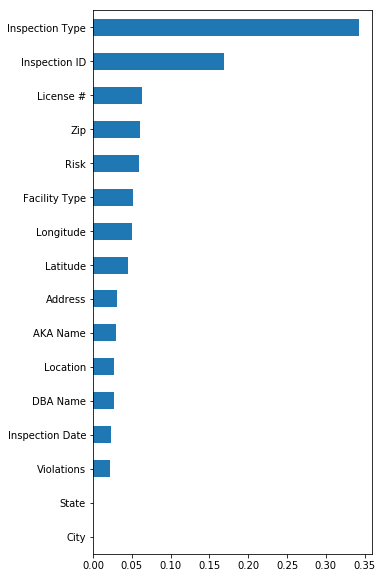

In [52]:
importances = pd.Series(search.best_estimator_.feature_importances_, X_train.columns)

# Change size of figure
plt.figure(figsize=(5,10))

# Sort and plot importances
importances.sort_values().plot.barh()

In [74]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 102kB 4.6MB/s 


In [0]:
best = search.best_estimator_

In [89]:
permuter = PermutationImportance(best, scoring='roc_auc', cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_train, y_train)

PermutationImportance(cv='prefit',
           estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=199, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
           n_iter=2, random_state=42, refit=True, scoring='roc_auc')

In [90]:
feature_names = X_test.columns.tolist()

eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1230 ± 0.0069,Inspection Type
0.0576 ± 0.0026,Inspection ID
0.0239 ± 0.0007,License #
0.0148 ± 0.0013,Longitude
0.0142 ± 0.0003,Latitude
0.0141 ± 0.0004,Zip
0.0093 ± 0.0013,Facility Type
0.0066 ± 0.0005,AKA Name
0.0042 ± 0.0006,Location
0.0037 ± 0.0005,Inspection Date


In [0]:
best2 = search.best_estimator_

permuter2 = PermutationImportance(best2, scoring='roc_auc', cv='prefit', n_iter=2, random_state=42)

#Part 4

1. A gradient descent - or any descent algorithm - seeks to minimize some function. In the case of machine learning, the minimand is usual some kind of error function (e.g. mean squared error); by minimizing the error one achieves a better fit.  Gradient descent relies on the fact that the gradient of a function gives the direction of fastest decrease; therefore you can iteratively subtract the gradient (or the gradient adjusted by a linear operator) from the starting point. 

2. The learning rate is the scalar (or even linear operator) for which the gradient is the multiplicand. Since the gradient gives a direction of fastest decrease, one can magnify or reduce the movement in that direction by multiplying it by a linear operator or scalar. 